#Decision Tree

In [36]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Importing cars_clus.csv dataset
df = pd.read_csv("/content/sample_data/Bank_Personal_Loan_Modelling.csv")

In [38]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [39]:
# View dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [40]:
# Feature extraction
inputs = df.drop('Personal Loan',axis='columns')
target = df['Personal Loan']

In [41]:
# Creating objects of labelEncoder class
le_age = LabelEncoder()
le_exp = LabelEncoder()
le_income = LabelEncoder()
le_family = LabelEncoder()
le_ccavg = LabelEncoder()
le_edu = LabelEncoder()
le_mortgage = LabelEncoder()
le_secAccounts = LabelEncoder()
le_CDAcc = LabelEncoder()
le_online = LabelEncoder()
le_creditCard = LabelEncoder()

In [42]:
inputs['age_n'] = le_age.fit_transform(inputs['Age'])
inputs['exp_n'] = le_exp.fit_transform(inputs['Experience'])
inputs['income_n'] = le_income.fit_transform(inputs['Income'])
inputs['family_n'] = le_family.fit_transform(inputs['Family'])
inputs['ccavg_n'] = le_ccavg.fit_transform(inputs['CCAvg'])
inputs['edu_n'] = le_edu.fit_transform(inputs['Education'])
inputs['mortgage_n'] = le_mortgage.fit_transform(inputs['Mortgage'])
inputs['secAcc_n'] = le_secAccounts.fit_transform(inputs['Securities Account'])
inputs['CDAcc_n'] = le_CDAcc.fit_transform(inputs['CD Account'])
inputs['online_n'] = le_online.fit_transform(inputs['Online'])
inputs['creditCard_n'] = le_creditCard.fit_transform(inputs['CreditCard'])

In [43]:
inputs.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,...,exp_n,income_n,family_n,ccavg_n,edu_n,mortgage_n,secAcc_n,CDAcc_n,online_n,creditCard_n
0,1,25,1,49,91107,4,1.6,1,0,1,...,4,33,3,19,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,...,22,22,2,18,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,18,3,0,12,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,12,74,0,34,1,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,11,31,3,12,1,0,0,0,0,1


In [44]:
inputs_n = inputs.drop(['ID','ZIP Code','Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'],axis='columns')


In [53]:
# Building the model
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=12)

In [55]:
# Fittng the model on train set
dtree=dtree.fit(inputs_n,target)

In [56]:
# Model score
dtree.score(inputs_n,target)

0.9994

[Text(0.4859913793103448, 0.9615384615384616, 'x[2] <= 72.5\nentropy = 0.456\nsamples = 5000\nvalue = [4520, 480]'),
 Text(0.2823275862068966, 0.8846153846153846, 'x[4] <= 37.5\nentropy = 0.078\nsamples = 3754\nvalue = [3718, 36]'),
 Text(0.2650862068965517, 0.8076923076923077, 'entropy = 0.0\nsamples = 3544\nvalue = [3544, 0]'),
 Text(0.2995689655172414, 0.8076923076923077, 'x[8] <= 0.5\nentropy = 0.661\nsamples = 210\nvalue = [174, 36]'),
 Text(0.22844827586206898, 0.7307692307692307, 'x[4] <= 53.5\nentropy = 0.538\nsamples = 195\nvalue = [171, 24]'),
 Text(0.21120689655172414, 0.6538461538461539, 'x[2] <= 60.5\nentropy = 0.627\nsamples = 153\nvalue = [129, 24]'),
 Text(0.08620689655172414, 0.5769230769230769, 'x[0] <= 5.0\nentropy = 0.374\nsamples = 97\nvalue = [90, 7]'),
 Text(0.06896551724137931, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10344827586206896, 0.5, 'x[2] <= 45.5\nentropy = 0.337\nsamples = 96\nvalue = [90, 6]'),
 Text(0.08620689655172414, 0.423076923

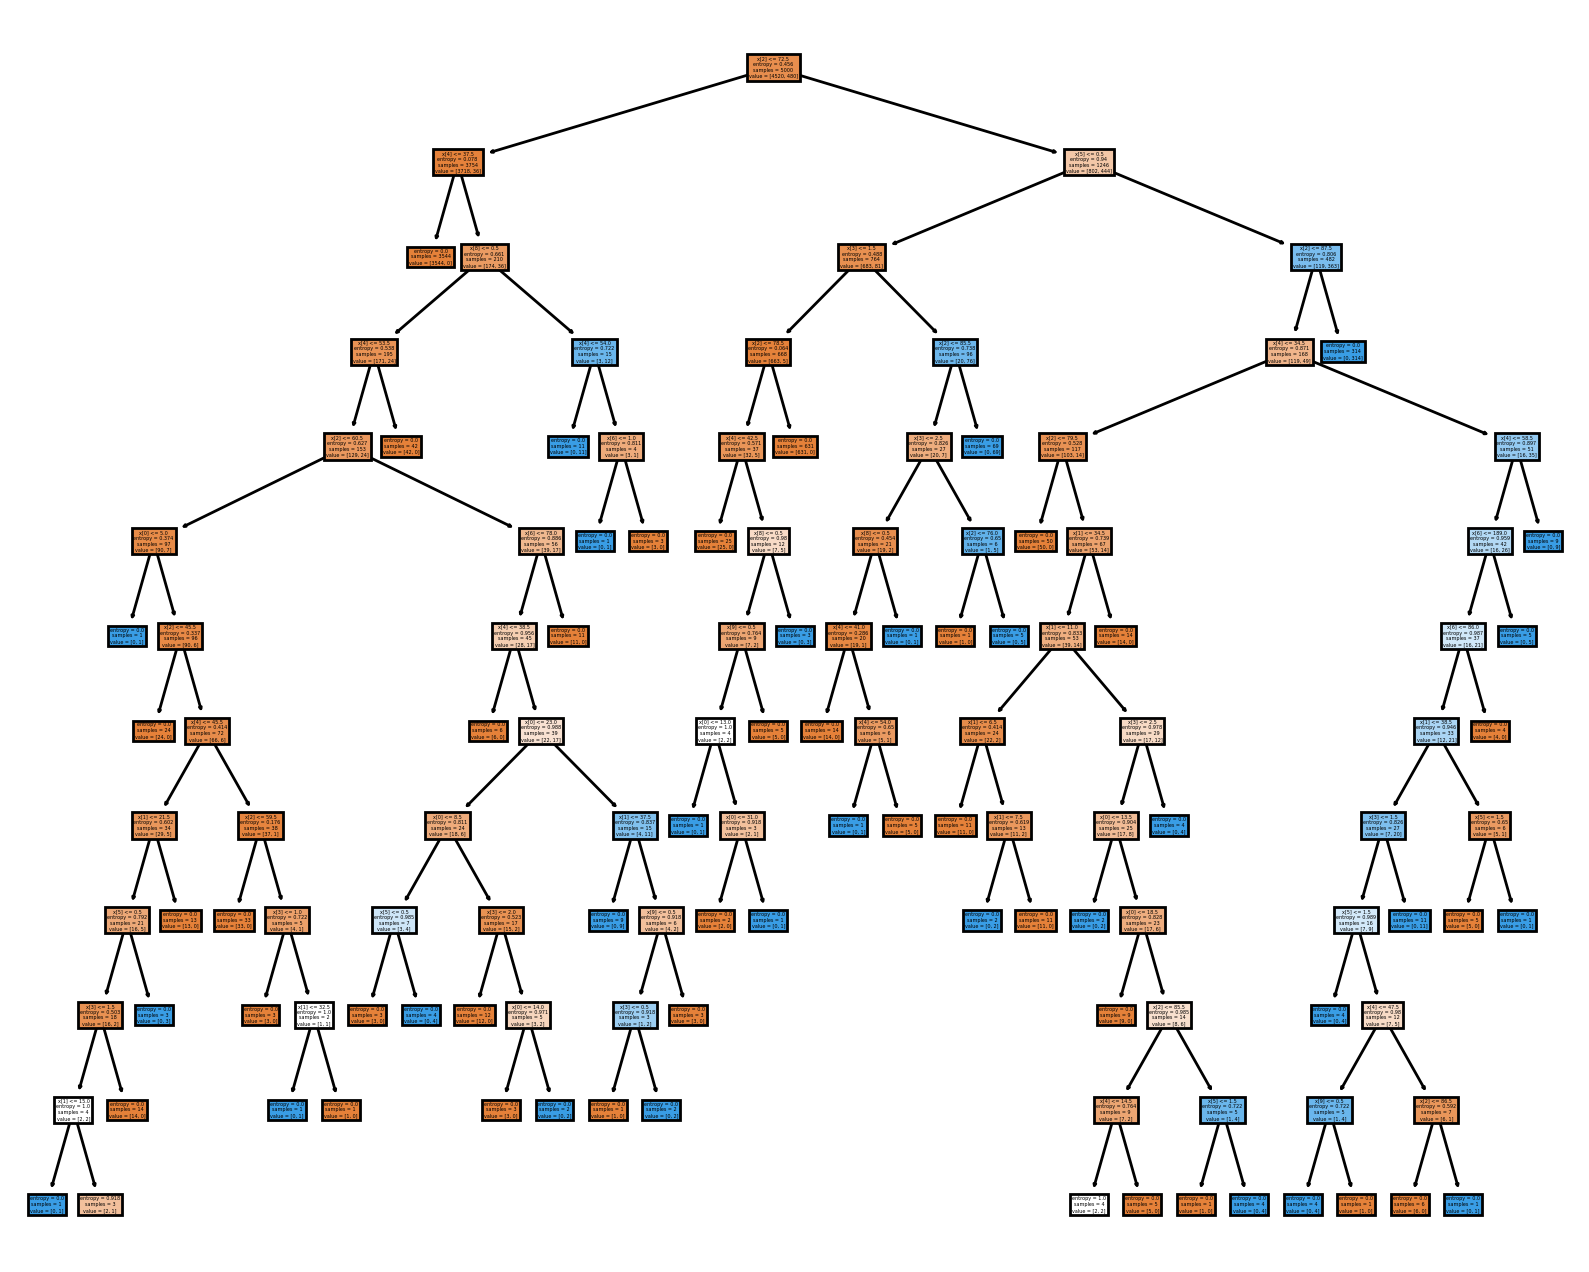

In [57]:
# Visual representation
plt.figure(figsize=(10,8),dpi=200)
tree.plot_tree(dtree,filled =True)